# Lab | Cleaning numerical data

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.



In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#reading in data

path_name = 'files_for_lab/'
file_name = 'we_fn_use_c_marketing_customer_value_analysis.csv'

customer_df = pd.read_csv(path_name+file_name)
customer_df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
customer_df.shape

(9134, 24)

In [6]:
#renaming column names to conform to PE8
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
#setting effective_to_date to datetime type
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [11]:
#checking type change
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [10]:
#check for nans
customer_df.isnull().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

There are no missing values in this dataset.

In [13]:
def num_cat_separation(df:pd.DataFrame)->pd.DataFrame:
    """
    Function takes as input a dataframe and outputs two dataframes: one with all the numeric columns and one with the categorical columns of the input dataframe

    Input
    df: original dataframe

    Output
    df_num: dataframe with numeric columns from the original dataframe
    df_cat: dataframe with categorical columns from the original dataframe

    """

    df_temp = df.copy()

    df_num = df_temp.select_dtypes(include = 'number')
    df_cat = df_temp.select_dtypes(include = 'object')

    return df_num, df_cat

In [14]:
#splitting customer_df into numeric and categorical datasets
customer_num, customer_cat = num_cat_separation(customer_df)

In [15]:
customer_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [16]:
customer_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


In [17]:
#dropping customer id column
customer_cat.drop('customer', axis=1, inplace=True)

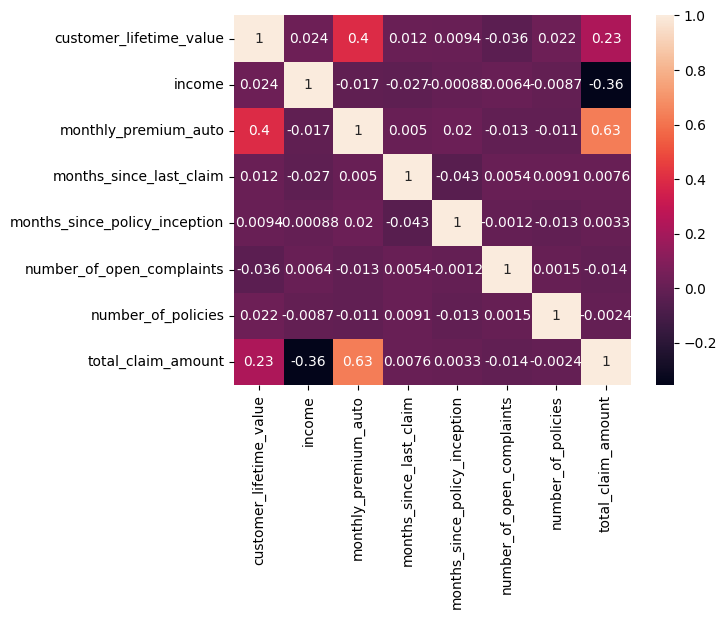

In [20]:
num_matrix = customer_num.corr()
sns.heatmap(num_matrix, annot=True)
plt.show()

#### The two columns that correlate the highest are the `monthly_premium_auto`and the `total_claim_amount` - the correlation value is 0.63. This makes sense because when you submit a claim to your insurance company, your monthly premium increases.

In [45]:
def continuous_discrete_numeric(df:pd.DataFrame, number_unique=36)->pd.DataFrame:
    """
    Takes a DataFrame with numeric only columns as input and returns two DataFrames: the first containing numeric continuous columns and the second containing numeric
    discrete columns. Continuous is defined as have more than 36 unique values.

    Input
    df: pd.DataFrame with numeric values only

    Output
    df_continuous: pd.DataFrame with numeric continuous values from the original dataset
    df_discrete: pd.DataFrame with numeric discrete values from the original dataset
    """

    df_temp = df.copy()

    continuous_cols = []
    discrete_cols = []

    #check if columns are all numeric
    if df_temp.dtypes.all() == True:
        continuous_cols = [col for col in df_temp.columns if df_temp[col].nunique()>=number_unique]
        discrete_cols = [col for col in df_temp.columns if df_temp[col].nunique()<number_unique]

    else:
        print('df does not contain only numeric values')
        

    return df_temp[continuous_cols], df_temp[discrete_cols]

In [46]:
continuous_df, discrete_df = continuous_discrete_numeric(customer_num)

In [51]:
discrete_df.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


In [69]:
#create barplot for the discrete values
def countplot_discrete(df:pd.DataFrame):
    """
    Creates a barplot for each column in the discrete value dataframe

    """

    df_temp = df.copy()
    
    for col in df_temp.columns:
        fig, ax = plt.subplots(figsize=(10,10))
        sns.countplot(x=df_temp[col], ax=ax)
        plt.show()
        

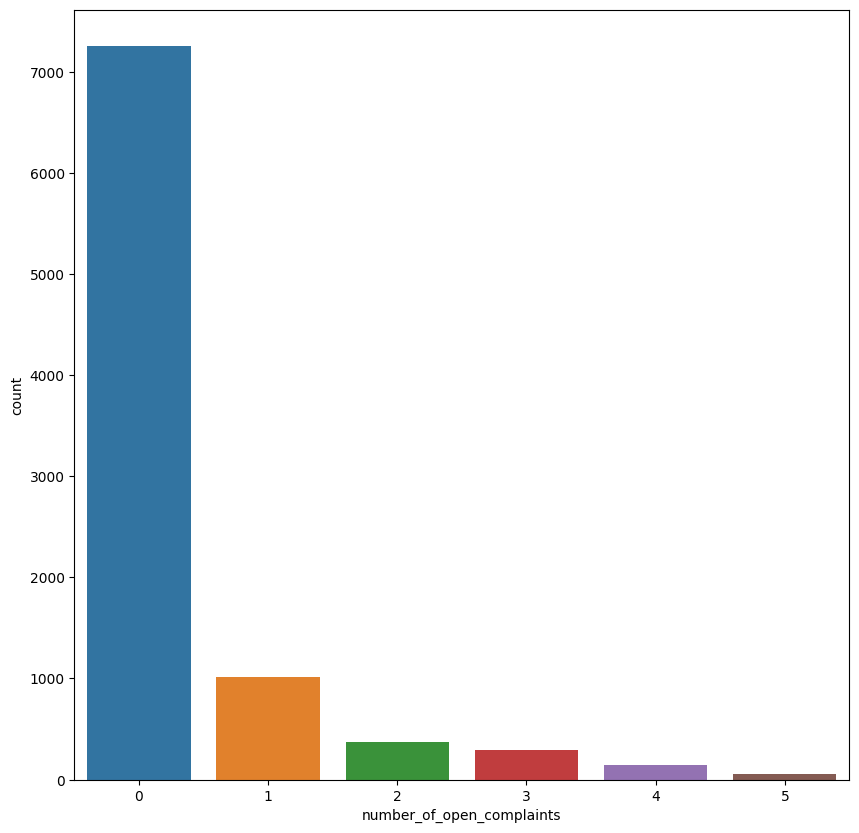

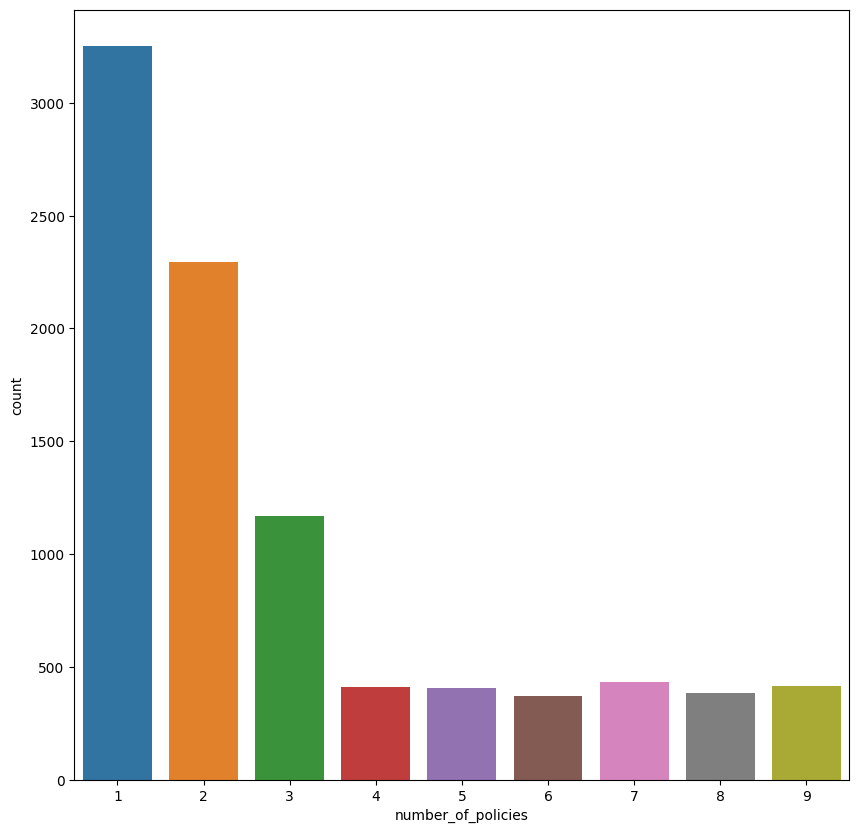

In [70]:
countplot_discrete(discrete_df)

In [67]:
def histogram_cont(df:pd.DataFrame):
    """
    Creates a histogram for each column in the dataframe
    """
    df_temp = df.copy()
    
    for col in df_temp.columns:
        fig, ax = plt.subplots(figsize=(10,10))
        sns.histplot(data=continuous_df, x=col, ax=ax)
        plt.show()
    

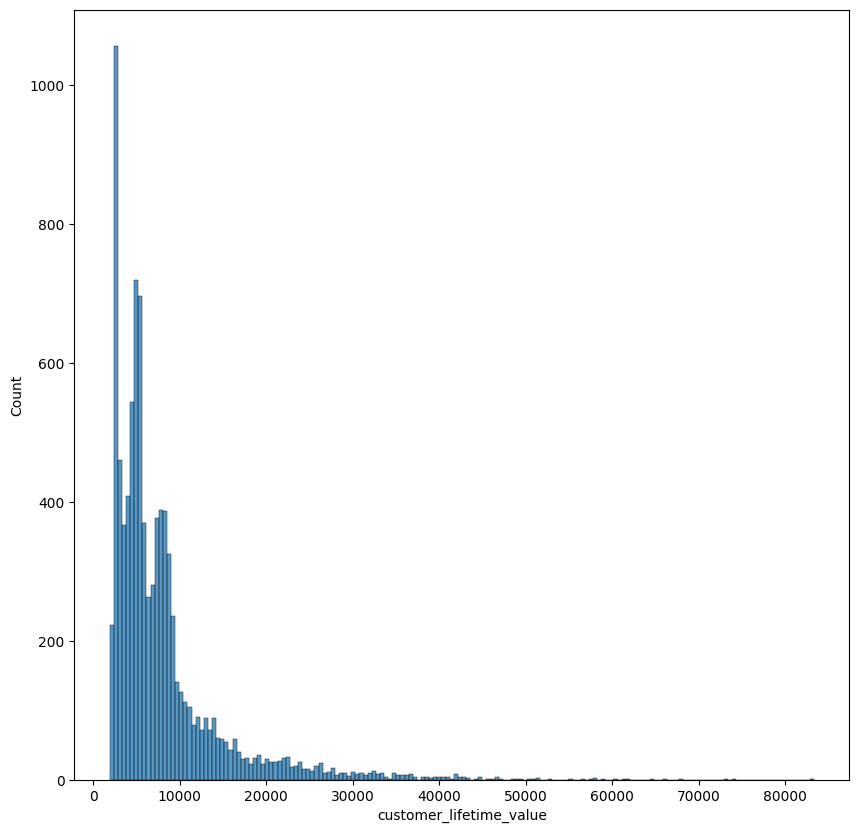

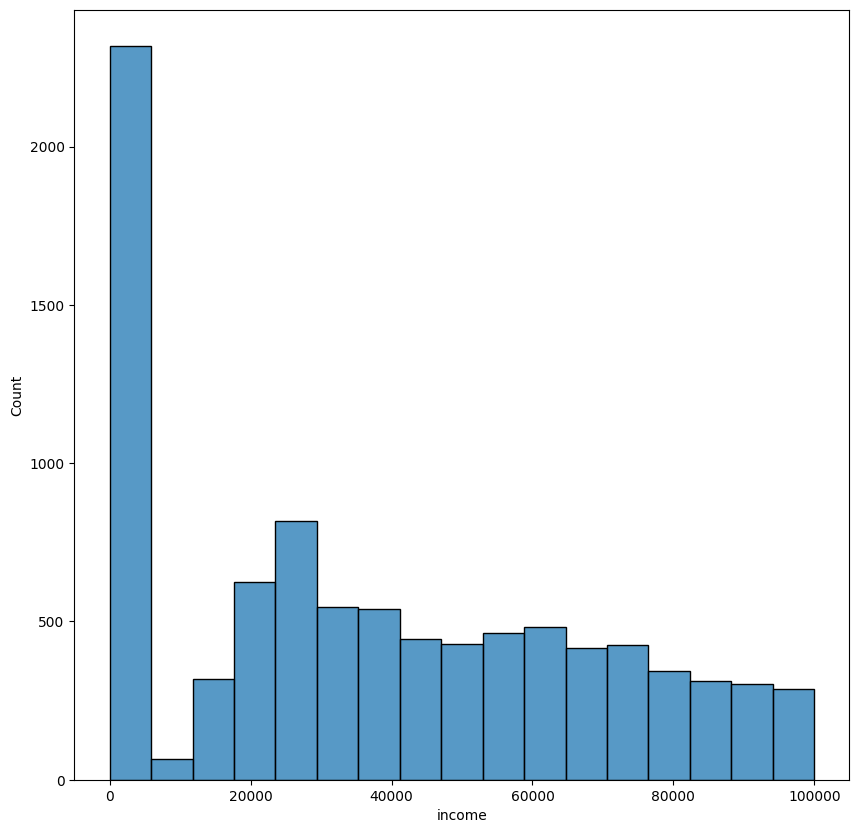

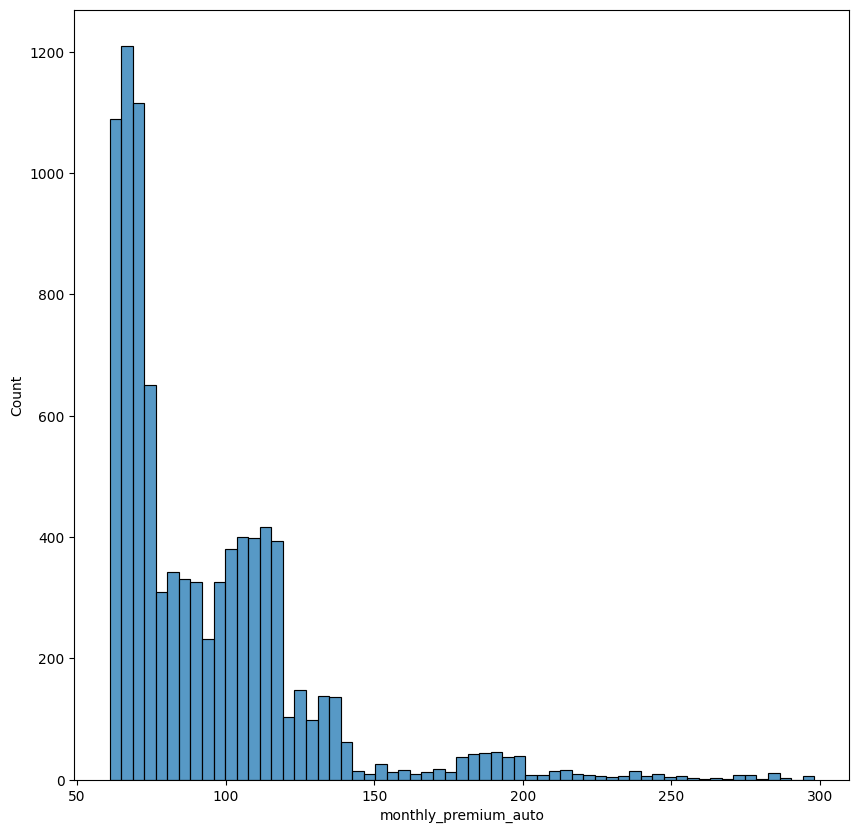

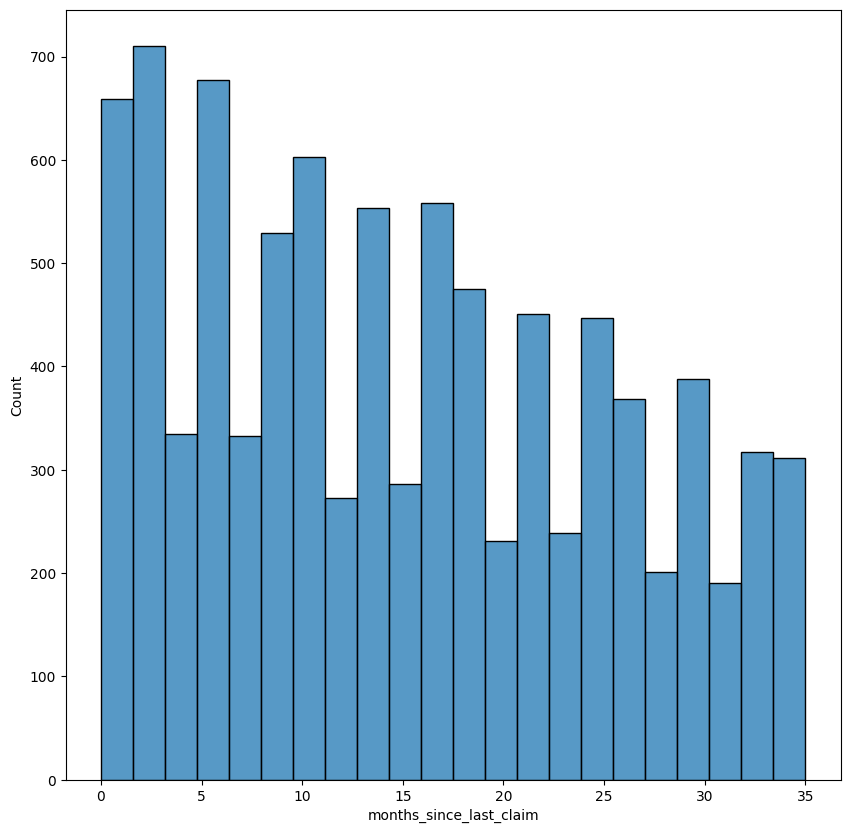

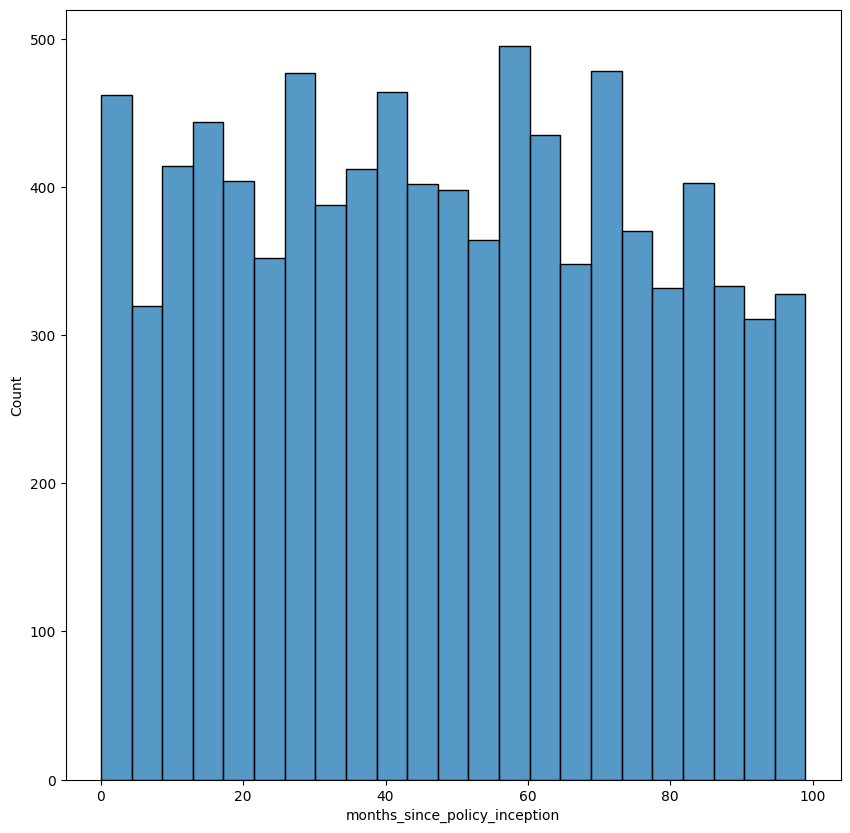

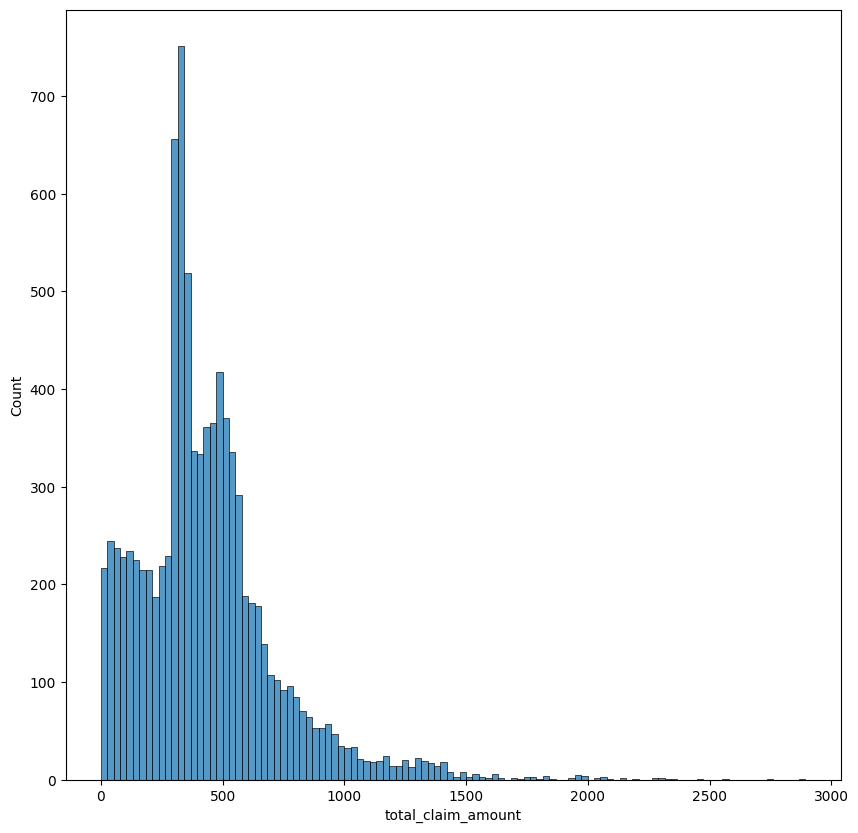

In [68]:
histogram_cont(continuous_df)

The histograms show that we'll need to apply transformers to the dataset.

### Looking for outliers

In [71]:
def box_hist_plots(df:pd.DataFrame):
    """
    Graphs a boxplot and histogram for each column in the dataframe
    """
    df_temp = df.copy()
    for col in df_temp.columns:
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(data=df_temp, x=col, ax=ax_box)
        sns.histplot(data=df_temp, x=col, ax=ax_hist)
        plt.show()

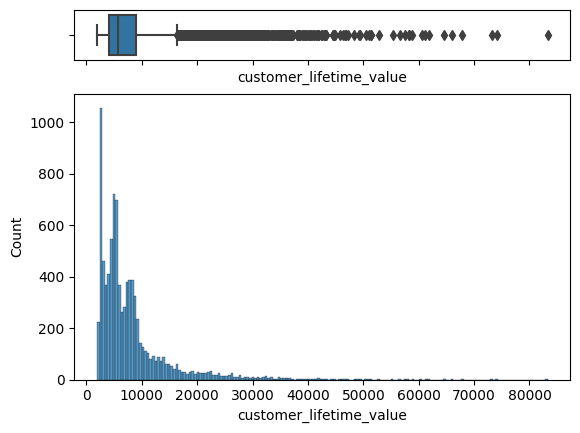

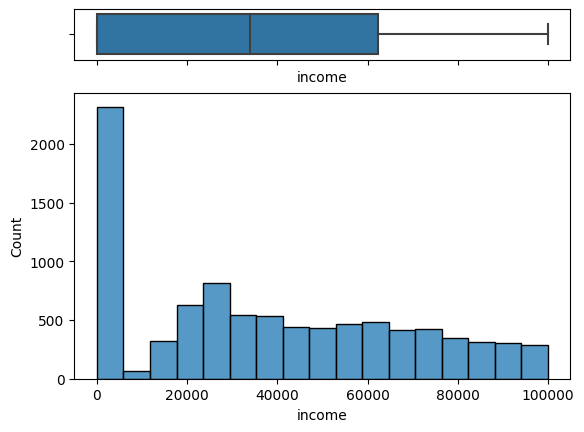

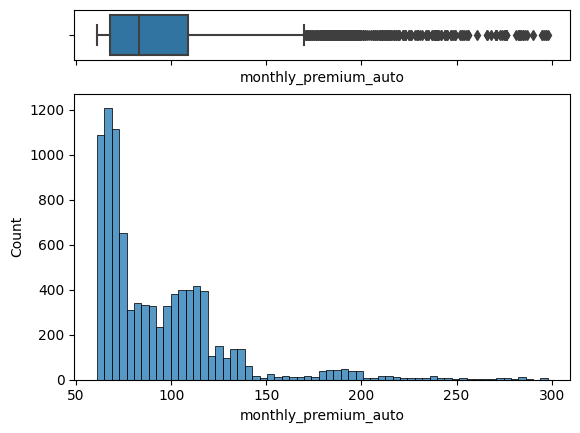

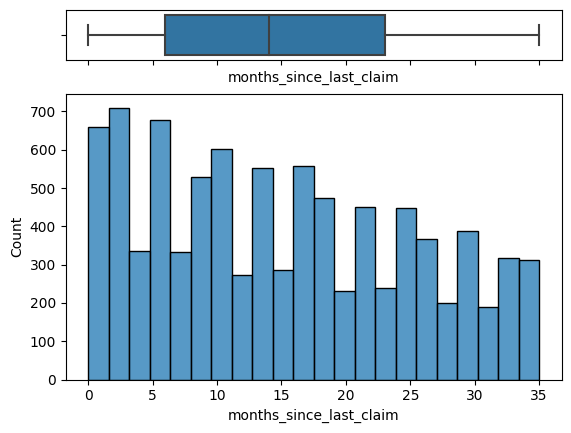

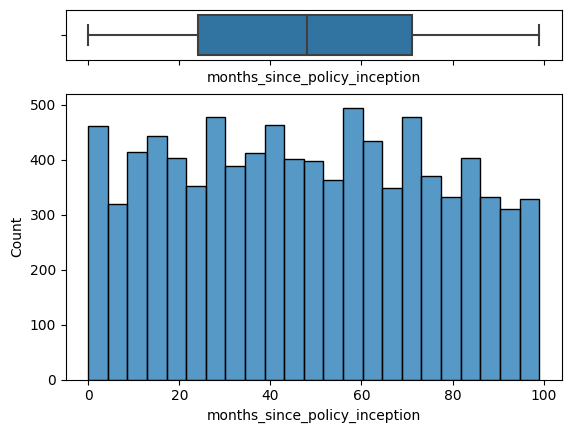

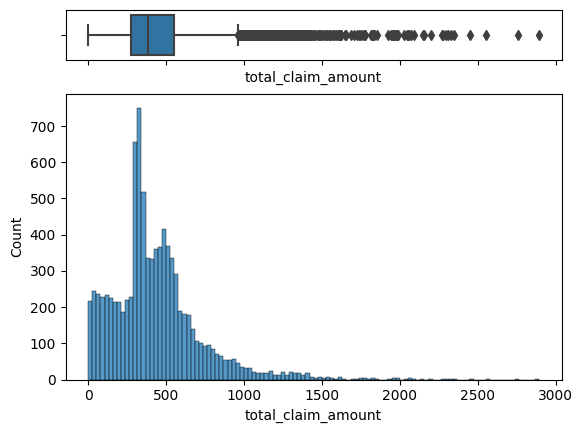

In [72]:
box_hist_plots(continuous_df)

### `customer_lifetime_value` and `total_claim_amount` have outliers according to the boxplot.